# Project 2. UNICEF - math score prediction

In [5531]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # show more rows
pd.set_option('display.max_columns', 50)  # show more columns

df = pd.read_csv('stud_math.csv')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [5532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5533]:
# rename the columns
df.columns = ['school', 'sex', 'age', 'address', 'large_family', 'parents_separated', 'mother_education',
              'father_education', 'mother_job', 'father_job', 'school_selection_reason', 'guardian',
              'travel_time', 'study_time', 'failures', 'school_supplement', 'family_supplement',
              'paid_math_lessons', 'activities', 'nursery', 'study_time2', 'wants_higher_education',
              'internet', 'romanticaly_involved', 'family_relations', 'free_time', 'go_out', 'health',
              'absences', 'score']
df.columns

Index(['school', 'sex', 'age', 'address', 'large_family', 'parents_separated',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'school_selection_reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_supplement', 'family_supplement',
       'paid_math_lessons', 'activities', 'nursery', 'study_time2',
       'wants_higher_education', 'internet', 'romanticaly_involved',
       'family_relations', 'free_time', 'go_out', 'health', 'absences',
       'score'],
      dtype='object')

In [5534]:
# we have two columns: study_time and study_time2. Let's analyse them...
df.study_time.unique()

array([ 2.,  3.,  1., nan,  4.])

In [5535]:
df.study_time2.unique()

array([ -6.,  -9.,  -3.,  nan, -12.])

In [5536]:
# study_time2 values do not make any sence - drop the column
df.drop(['study_time2'], inplace=True, axis=1)
df.columns

Index(['school', 'sex', 'age', 'address', 'large_family', 'parents_separated',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'school_selection_reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'school_supplement', 'family_supplement',
       'paid_math_lessons', 'activities', 'nursery', 'wants_higher_education',
       'internet', 'romanticaly_involved', 'family_relations', 'free_time',
       'go_out', 'health', 'absences', 'score'],
      dtype='object')

## Helper functions:

In [5537]:
def show_column_info(x, n):
    series_x = pd.DataFrame(df[x].value_counts())
    display(series_x)
    print(
        f'Values present more than {n} times:', (df[x].value_counts() > n).sum())
    print('Unique values:', df[x].nunique())
    print('')  # empty line for usability purposes
    df.loc[:, [x]].info()

In [5538]:
def show_without_outliners(x, l):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)

    iqr = q3 - q1

    print(
        f'Q1: {q1}, Q3: {q3}, IQR: {iqr}, Valid range: [{q1 - 1.5 * iqr}, {q3 + 1.5 * iqr}].')

    df[x].loc[df[x].between(q1 - 1.5 * iqr, q3 + 1.5 * iqr)
              ].hist(bins=10, range=(df[x].min(), df[x].max()), label=l)
    plt.legend()

In [5539]:
def normalise_education(x):
    df[x] = df[x].apply(
        lambda x: None if pd.isna(x) else
        'None' if x == 0 else
        '1-4 years' if x == 1 else
        '5-9 years' if x == 2 else
        'A-levels' if x == 3 else 'High Education'
    )

In [5540]:
def normalise_time(x):
    df[x] = df[x].apply(
        lambda x: None if pd.isna(x) else
        'very little' if x == 1 else
        'little' if x == 2 else
        'average' if x == 3 else
        'a lot' if x == 4 else 'plenty'
    )

In [5541]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [5542]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Field 'school'

In [5543]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [5544]:
df.school.unique()

array(['GP', 'MS'], dtype=object)

In [5545]:
# all good, no wrong values, we have only 2 schools in the dataset

In [5546]:
show_column_info('school', 50)

,school
GP,349
MS,46


Values present more than 50 times: 1
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

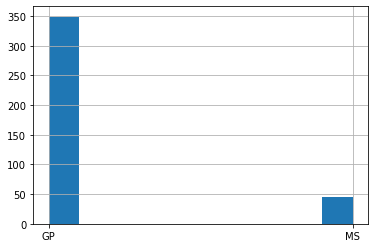

In [5547]:
df.school.hist()
df.school.describe()

## Field 'sex'

In [5548]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [5549]:
df.sex.unique()

array(['F', 'M'], dtype=object)

In [5550]:
# all good, no wrong values, we have only 2 values ('F' and 'M') in the dataset

In [5551]:
show_column_info('school', 50)

,school
GP,349
MS,46


Values present more than 50 times: 1
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

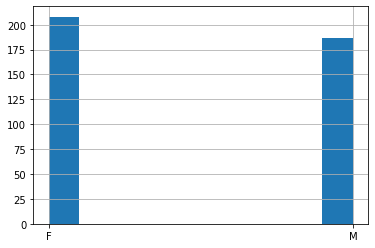

In [5552]:
df.sex.hist()
df.sex.describe()

##  Field 'age'

In [5553]:
df.age.value_counts()

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

In [5554]:
df.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

In [5555]:
# all good, no wrong values, we have expected ages from 15 till 22 in the dataset

In [5556]:
show_column_info('age', 50)

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


Values present more than 50 times: 4
Unique values: 8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

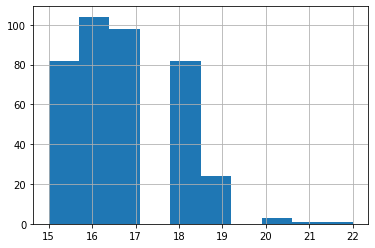

In [5557]:
df.age.hist()
df.age.describe()

Q1: 16.0, Q3: 18.0, IQR: 2.0, Valid range: [13.0, 21.0].


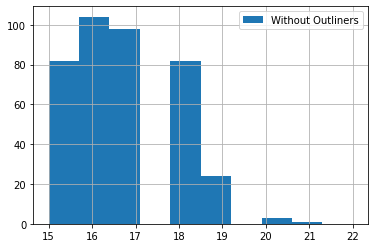

In [5558]:
# we might have the outliners in the dataset
show_without_outliners('age', 'Without Outliners')

In [5559]:
# we 1 person of the age of 22 that is considered as an outliner (> Q3 + 1.5 * IQR).
# However, we were told that the valid age range is 15-22.
# Therefore, we believe that age 22 is not an outliner (common sense rule)

## Field 'address'

In [5560]:
df.address.unique()

array(['U', nan, 'R'], dtype=object)

In [5561]:
# with NaN values:
df.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

In [5562]:
# without NaN values
df.address.value_counts()

U    295
R     83
Name: address, dtype: int64

In [5563]:
# we see that some of the rows have no value for this field.
# However, if a value is present it is in the expected range ('U' or 'R')

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

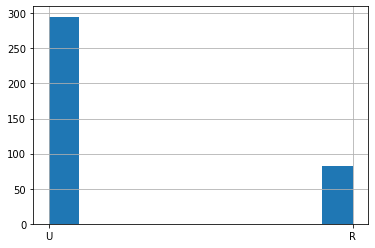

In [5564]:
df.address.hist()
df.address.describe()

In [5565]:
# convert to more human-friendly values
df.address = df.address.apply(lambda x: None if pd.isna(
    x) else 'Urban' if x == 'U' else 'Rural')
show_column_info('address', 50)

,address
Urban,295
Rural,83


Values present more than 50 times: 2
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'large_family'

In [5566]:
df.large_family.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [5567]:
# with NaN values:
df.large_family.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: large_family, dtype: int64

In [5568]:
# without NaN values
df.large_family.value_counts()

GT3    261
LE3    107
Name: large_family, dtype: int64

In [5569]:
# we see that some of the rows have no value for this field.
# However, if a value is present it is in the expected range ('GT3' or 'LE3')

count     368
unique      2
top       GT3
freq      261
Name: large_family, dtype: object

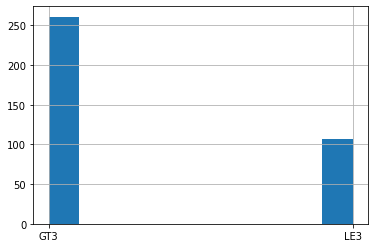

In [5570]:
df.large_family.hist()
df.large_family.describe()

In [5571]:
# convert to boolean typy
df.large_family = df.large_family.apply(
    lambda x: None if pd.isna(x) else True if x == 'GT3' else False)
show_column_info('large_family', 50)

,large_family
True,261
False,107


Values present more than 50 times: 2
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   large_family  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'parents_separated'

In [5572]:
df.parents_separated.unique()

array(['A', nan, 'T'], dtype=object)

In [5573]:
# with NaN values:
df.parents_separated.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: parents_separated, dtype: int64

In [5574]:
# without NaN values
df.parents_separated.value_counts()

T    314
A     36
Name: parents_separated, dtype: int64

In [5575]:
# we see that some of the rows have no value for this field.
# However, if a value is present it is in the expected range ('T' or 'A')

count     350
unique      2
top         T
freq      314
Name: parents_separated, dtype: object

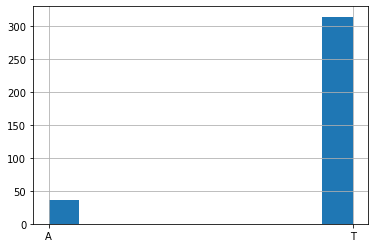

In [5576]:
df.parents_separated.hist()
df.parents_separated.describe()

In [5577]:
# convert to boolean typy
df.parents_separated = df.parents_separated.apply(
    lambda x: None if pd.isna(x) else True if x == 'A' else False)
show_column_info('parents_separated', 50)

,parents_separated
False,314
True,36


Values present more than 50 times: 1
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   parents_separated  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'mother_education' 

In [5578]:
df.mother_education.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

In [5579]:
# with NaN values:
df.mother_education.value_counts(dropna=False)

4.0    131
2.0    102
3.0     97
1.0     59
NaN      3
0.0      3
Name: mother_education, dtype: int64

In [5580]:
# without NaN values
df.mother_education.value_counts()

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: mother_education, dtype: int64

In [5581]:
# we see that some of the rows have no value for this field.
# However, if a value is present it is in the expected range 0-4

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: mother_education, dtype: float64

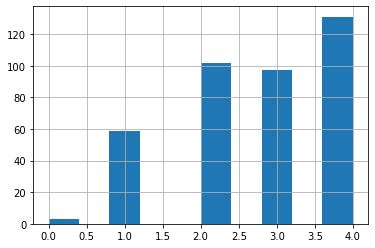

In [5582]:
df.mother_education.hist()
df.mother_education.describe()

In [5583]:
show_column_info('mother_education', 50)

,mother_education
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Values present more than 50 times: 4
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mother_education  392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Q1: 2.0, Q3: 4.0, IQR: 2.0, Valid range: [-1.0, 7.0].


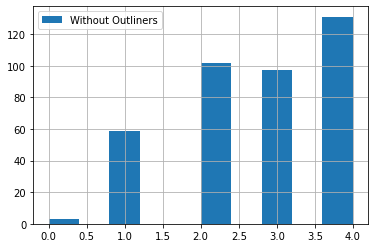

In [5584]:
# do we have outliners in the dataset?
show_without_outliners('mother_education', 'Without Outliners')

In [5585]:
# No we do not have outliners! Also common sense rule also confirms that 0-4 values are valid
# But lets convert them into string values:
normalise_education('mother_education')
show_column_info('mother_education', 50)

,mother_education
High Education,131
5-9 years,102
A-levels,97
1-4 years,59
None,3


Values present more than 50 times: 4
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mother_education  392 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'father_education'

In [5586]:
df.father_education.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [5587]:
# we can see that there is a wrong value 40 - let's change it to NaN
df.father_education = df.father_education.apply(
    lambda x: None if x < 0 or x > 4 else x)
df.father_education.unique()

array([ 4.,  1.,  2.,  3., nan,  0.])

In [5588]:
# with NaN values:
df.father_education.value_counts(dropna=False)

2.0    106
3.0     96
4.0     88
1.0     78
NaN     25
0.0      2
Name: father_education, dtype: int64

In [5589]:
# without NaN values
df.father_education.value_counts()

2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: father_education, dtype: int64

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: father_education, dtype: float64

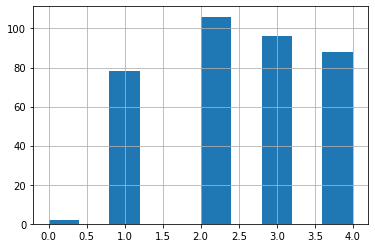

In [5590]:
df.father_education.hist()
df.father_education.describe()

In [5591]:
show_column_info('father_education', 50)

,father_education
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


Values present more than 50 times: 4
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   father_education  370 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Q1: 2.0, Q3: 3.0, IQR: 1.0, Valid range: [0.5, 4.5].


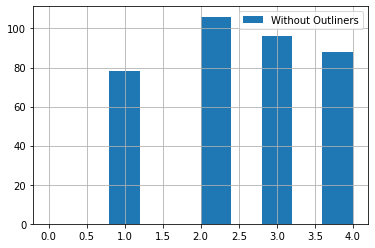

In [5592]:
# do we have outliners in the dataset?
show_without_outliners('father_education', 'Without Outliners')

In [5593]:
# the value 0 is statistically considered to be an outliner.
# However, we were told that the valid range is [0-4], so we keep it

# But lets convert values into string values:
normalise_education('father_education')
show_column_info('father_education', 50)

,father_education
5-9 years,106
A-levels,96
High Education,88
1-4 years,78
None,2


Values present more than 50 times: 4
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   father_education  370 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'mother_job'

In [5594]:
df.mother_job.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [5595]:
# with NaN values:
df.mother_job.value_counts(dropna=False)

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: mother_job, dtype: int64

In [5596]:
# without NaN values:
df.mother_job.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64

count       376
unique        5
top       other
freq        133
Name: mother_job, dtype: object

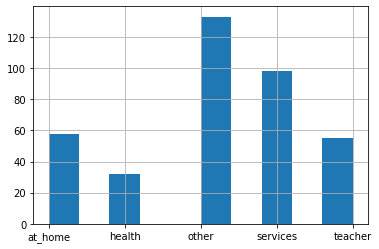

In [5597]:
df.mother_job.hist()
df.mother_job.describe()

In [5598]:
show_column_info('mother_job', 50)

,mother_job
other,133
services,98
at_home,58
teacher,55
health,32


Values present more than 50 times: 4
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mother_job  376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5599]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'father_job'

In [5600]:
df.father_job.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [5601]:
# with NaN values:
df.father_job.value_counts(dropna=False)

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

In [5602]:
# without NaN values:
df.father_job.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

count       359
unique        5
top       other
freq        197
Name: father_job, dtype: object

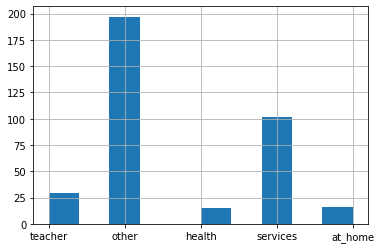

In [5603]:
df.father_job.hist()
df.father_job.describe()

In [5604]:
show_column_info('father_job', 50)

,father_job
other,197
services,102
teacher,29
at_home,16
health,15


Values present more than 50 times: 2
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   father_job  359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5605]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'school_selection_reason'

In [5606]:
df.school_selection_reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [5607]:
# with NaN values:
df.school_selection_reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          34
NaN            17
Name: school_selection_reason, dtype: int64

In [5608]:
# without NaN values:
df.school_selection_reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: school_selection_reason, dtype: int64

count        378
unique         4
top       course
freq         137
Name: school_selection_reason, dtype: object

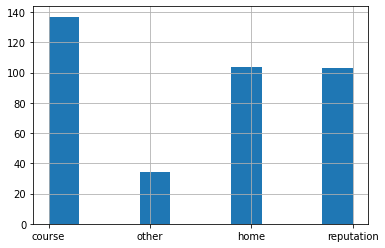

In [5609]:
df.school_selection_reason.hist()
df.school_selection_reason.describe()

In [5610]:
show_column_info('school_selection_reason', 50)

,school_selection_reason
course,137
home,104
reputation,103
other,34


Values present more than 50 times: 3
Unique values: 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   school_selection_reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5611]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'guardian'

In [5612]:
df.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [5613]:
# with NaN values:
df.guardian.value_counts(dropna=False)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

In [5614]:
# without NaN values:
df.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

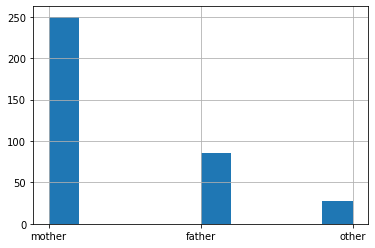

In [5615]:
df.guardian.hist()
df.guardian.describe()

In [5616]:
show_column_info('guardian', 50)

,guardian
mother,250
father,86
other,28


Values present more than 50 times: 2
Unique values: 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'travel_time'

In [5617]:
df.travel_time.unique()

array([ 2.,  1.,  3., nan,  4.])

In [5618]:
# with NaN values:
df.travel_time.value_counts(dropna=False)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: travel_time, dtype: int64

In [5619]:
# without NaN values:
df.travel_time.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: travel_time, dtype: int64

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

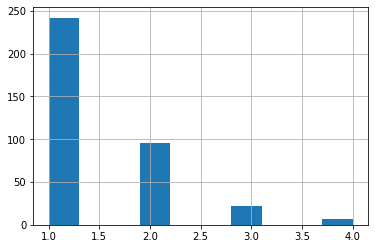

In [5620]:
df.travel_time.hist()
df.travel_time.describe()

In [5621]:
show_column_info('travel_time', 50)

,travel_time
1.0,242
2.0,96
3.0,22
4.0,7


Values present more than 50 times: 2
Unique values: 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Q1: 1.0, Q3: 2.0, IQR: 1.0, Valid range: [-0.5, 3.5].


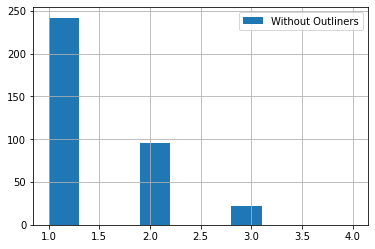

In [5622]:
# do we have outliners in the dataset?
show_without_outliners('travel_time', 'Without Outliners')

In [5623]:
# the value 4 is statistically considered to be an outliner.
# However, we were told that the valid range is [1-4], so we keep it

# lets convert them into string values:
df.travel_time = df.travel_time.apply(
    lambda x: None if pd.isna(x) else
    '<15 min' if x == 1 else
    '15-30 min' if x == 2 else
    '30-60 min' if x == 3 else '>60 min'
)
show_column_info('travel_time', 50)

,travel_time
<15 min,242
15-30 min,96
30-60 min,22
>60 min,7


Values present more than 50 times: 2
Unique values: 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   travel_time  367 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'study_time'

In [5624]:
df.study_time.unique()

array([ 2.,  3.,  1., nan,  4.])

In [5625]:
# with NaN values:
df.study_time.value_counts(dropna=False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: study_time, dtype: int64

In [5626]:
# without NaN values:
df.study_time.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: study_time, dtype: int64

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: study_time, dtype: float64

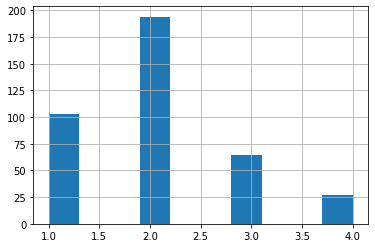

In [5627]:
df.study_time.hist()
df.study_time.describe()

In [5628]:
show_column_info('study_time', 50)

,study_time
2.0,194
1.0,103
3.0,64
4.0,27


Values present more than 50 times: 3
Unique values: 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Q1: 1.0, Q3: 2.0, IQR: 1.0, Valid range: [-0.5, 3.5].


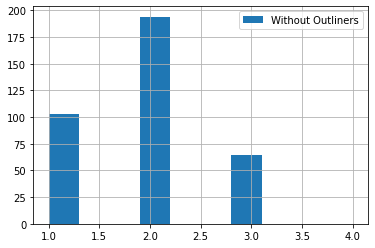

In [5629]:
# do we have outliners in the dataset?
show_without_outliners('study_time', 'Without Outliners')

In [5630]:
# the value 4 is statistically considered to be an outliner.
# However, we were told that the valid range is [1-4], so we keep it

# lets convert them into string values:
df.study_time = df.study_time.apply(
    lambda x: None if pd.isna(x) else
    '<2 hours' if x == 1 else
    '2-5 hours' if x == 2 else
    '5-10 hours' if x == 3 else '>10 hours'
)
show_column_info('study_time', 50)

,study_time
2-5 hours,194
<2 hours,103
5-10 hours,64
>10 hours,27


Values present more than 50 times: 3
Unique values: 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   study_time  388 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'failures' 

In [5631]:
df.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [5632]:
# with NaN values:
df.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

In [5633]:
# without NaN values:
df.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

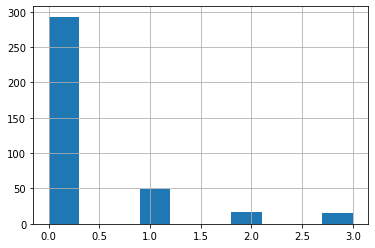

In [5634]:
df.failures.hist()
df.failures.describe()

In [5635]:
show_column_info('failures', 50)

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Values present more than 50 times: 1
Unique values: 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [5636]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

##  Field 'school_supplement'

In [5637]:
df.school_supplement.unique()

array(['yes', 'no', nan], dtype=object)

In [5638]:
# with NaN values:
df.school_supplement.value_counts(dropna=False)

no     335
yes     51
NaN      9
Name: school_supplement, dtype: int64

In [5639]:
# without NaN values:
df.school_supplement.value_counts()

no     335
yes     51
Name: school_supplement, dtype: int64

count     386
unique      2
top        no
freq      335
Name: school_supplement, dtype: object

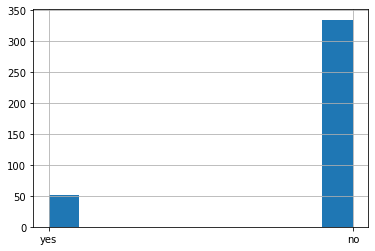

In [5640]:
df.school_supplement.hist()
df.school_supplement.describe()

In [5641]:
# convert to boolean typy
df.school_supplement = df.school_supplement.apply(
    lambda x: None if pd.isna(x) else True if x == 'yes' else False)
show_column_info('school_supplement', 50)

,school_supplement
False,335
True,51


Values present more than 50 times: 2
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school_supplement  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5642]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'family_supplement' 

In [5643]:
df.family_supplement.unique()

array(['no', 'yes', nan], dtype=object)

In [5644]:
# with NaN values:
df.family_supplement.value_counts(dropna=False)

yes    219
no     137
NaN     39
Name: family_supplement, dtype: int64

In [5645]:
# without NaN values:
df.family_supplement.value_counts()

yes    219
no     137
Name: family_supplement, dtype: int64

count     356
unique      2
top       yes
freq      219
Name: family_supplement, dtype: object

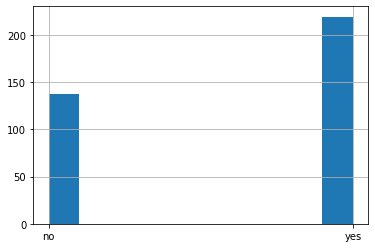

In [5646]:
df.family_supplement.hist()
df.family_supplement.describe()

In [5647]:
# convert to boolean typy
df.family_supplement = df.family_supplement.apply(
    lambda x: None if pd.isna(x) else True if x == 'yes' else False)
show_column_info('family_supplement', 50)

,family_supplement
True,219
False,137


Values present more than 50 times: 2
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   family_supplement  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5648]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'paid_math_lessons'

In [5649]:
df.paid_math_lessons.unique()

array(['no', nan, 'yes'], dtype=object)

In [5650]:
# with NaN values:
df.paid_math_lessons.value_counts(dropna=False)

no     200
yes    155
NaN     40
Name: paid_math_lessons, dtype: int64

In [5651]:
# without NaN values:
df.paid_math_lessons.value_counts()

no     200
yes    155
Name: paid_math_lessons, dtype: int64

count     355
unique      2
top        no
freq      200
Name: paid_math_lessons, dtype: object

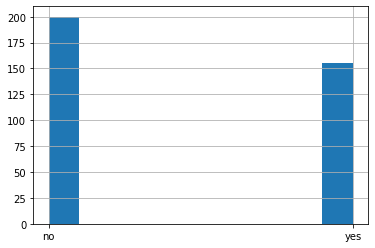

In [5652]:
df.paid_math_lessons.hist()
df.paid_math_lessons.describe()

In [5653]:
# convert to boolean typy
df.paid_math_lessons = df.paid_math_lessons.apply(
    lambda x: None if pd.isna(x) else True if x == 'yes' else False)
show_column_info('paid_math_lessons', 50)

,paid_math_lessons
False,200
True,155


Values present more than 50 times: 2
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   paid_math_lessons  355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5654]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'activities'

In [5655]:
df.activities.unique()

array(['no', 'yes', nan], dtype=object)

In [5656]:
# with NaN values:
df.activities.value_counts(dropna=False)

yes    195
no     186
NaN     14
Name: activities, dtype: int64

In [5657]:
# without NaN values:
df.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

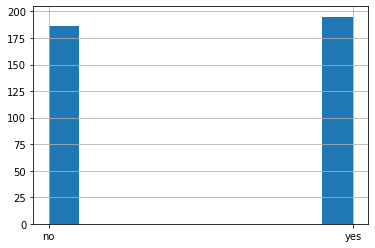

In [5658]:
df.activities.hist()
df.activities.describe()

In [5659]:
# convert to boolean typy
df.activities = df.activities.apply(
    lambda x: None if pd.isna(x) else True if x == 'yes' else False)
show_column_info('activities', 50)

,activities
True,195
False,186


Values present more than 50 times: 2
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5660]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'nursery'

In [5661]:
df.nursery.unique()

array(['yes', 'no', nan], dtype=object)

In [5662]:
# with NaN values:
df.nursery.value_counts(dropna=False)

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

In [5663]:
# without NaN values:
df.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

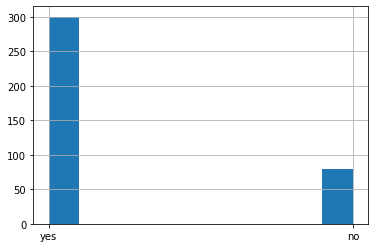

In [5664]:
df.nursery.hist()
df.nursery.describe()

In [5665]:
# convert to boolean typy
df.nursery = df.nursery.apply(
    lambda x: None if pd.isna(x) else True if x == 'yes' else False)
show_column_info('nursery', 50)

,nursery
True,300
False,79


Values present more than 50 times: 2
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5666]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'wants_higher_education'

In [5667]:
df.wants_higher_education.unique()

array(['yes', nan, 'no'], dtype=object)

In [5668]:
# with NaN values:
df.wants_higher_education.value_counts(dropna=False)

yes    356
NaN     20
no      19
Name: wants_higher_education, dtype: int64

In [5669]:
# without NaN values:
df.wants_higher_education.value_counts()

yes    356
no      19
Name: wants_higher_education, dtype: int64

count     375
unique      2
top       yes
freq      356
Name: wants_higher_education, dtype: object

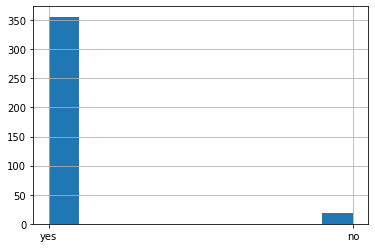

In [5670]:
df.wants_higher_education.hist()
df.wants_higher_education.describe()

In [5671]:
# convert to boolean typy
df.wants_higher_education = df.wants_higher_education.apply(
    lambda x: None if pd.isna(x) else True if x == 'yes' else False)
show_column_info('wants_higher_education', 50)

,wants_higher_education
True,356
False,19


Values present more than 50 times: 1
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   wants_higher_education  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5672]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'internet'

In [5673]:
df.internet.unique()

array([nan, 'yes', 'no'], dtype=object)

In [5674]:
# with NaN values:
df.internet.value_counts(dropna=False)

yes    305
no      56
NaN     34
Name: internet, dtype: int64

In [5675]:
# without NaN values:
df.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

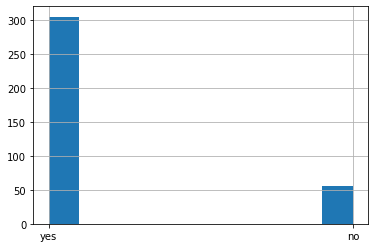

In [5676]:
df.internet.hist()
df.internet.describe()

In [5677]:
# convert to boolean typy
df.internet = df.internet.apply(
    lambda x: None if pd.isna(x) else True if x == 'yes' else False)
show_column_info('internet', 50)

,internet
True,305
False,56


Values present more than 50 times: 2
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5678]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'romanticaly_involved' 

In [5679]:
df.romanticaly_involved.unique()

array(['no', nan, 'yes'], dtype=object)

In [5680]:
# with NaN values:
df.romanticaly_involved.value_counts(dropna=False)

no     240
yes    124
NaN     31
Name: romanticaly_involved, dtype: int64

In [5681]:
# without NaN values:
df.romanticaly_involved.value_counts()

no     240
yes    124
Name: romanticaly_involved, dtype: int64

count     364
unique      2
top        no
freq      240
Name: romanticaly_involved, dtype: object

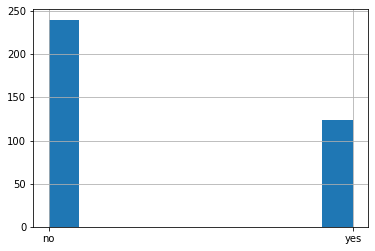

In [5682]:
df.romanticaly_involved.hist()
df.romanticaly_involved.describe()

In [5683]:
# convert to boolean typy
df.romanticaly_involved = df.romanticaly_involved.apply(
    lambda x: None if pd.isna(x) else True if x == 'yes' else False)
show_column_info('romanticaly_involved', 50)

,romanticaly_involved
False,240
True,124


Values present more than 50 times: 2
Unique values: 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   romanticaly_involved  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [5684]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

## Field 'family_relations' 

In [5685]:
df.family_relations.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [5686]:
# with NaN values:
df.family_relations.value_counts(dropna=False)

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: family_relations, dtype: int64

In [5687]:
# without NaN values:
df.family_relations.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: family_relations, dtype: int64

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_relations, dtype: float64

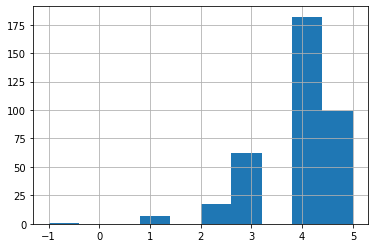

In [5688]:
df.family_relations.hist()
df.family_relations.describe()

Q1: 4.0, Q3: 5.0, IQR: 1.0, Valid range: [2.5, 6.5].


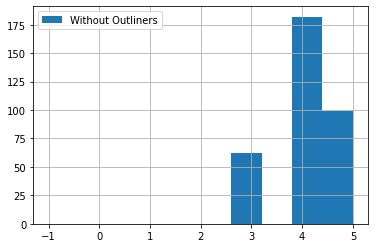

In [5689]:
# do we have outliners in the dataset?
show_without_outliners('family_relations', 'Without Outliners')

In [5690]:
# Values -1 and 1 are statistically considered outliners. However, we were told that value 1 is a valid value
# Lets filter -1 only:
df.family_relations = df.family_relations.apply(
    lambda x: None if pd.isna(x) else x if x >= 1 and x <= 5 else None)
show_column_info('family_relations', 50)

,family_relations
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


Values present more than 50 times: 3
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   family_relations  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    367.000000
mean       3.950954
std        0.891853
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_relations, dtype: float64

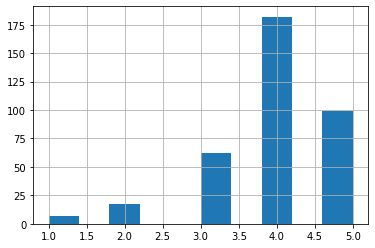

In [5691]:
df.family_relations.hist()
df.family_relations.describe()

In [5692]:
# lets convert values into string values:
df.family_relations = df.family_relations.apply(
    lambda x: None if pd.isna(x) else
    'very bad' if x == 1 else
    'bad' if x == 2 else
    'normal' if x == 3 else
    'good' if x == 4 else 'excellent'
)
show_column_info('family_relations', 50)

,family_relations
good,182
excellent,99
normal,62
bad,17
very bad,7


Values present more than 50 times: 3
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   family_relations  367 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'free_time' 

In [5693]:
df.free_time.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

In [5694]:
# with NaN values:
df.free_time.value_counts(dropna=False)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: free_time, dtype: int64

In [5695]:
# without NaN values:
df.free_time.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: free_time, dtype: int64

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64

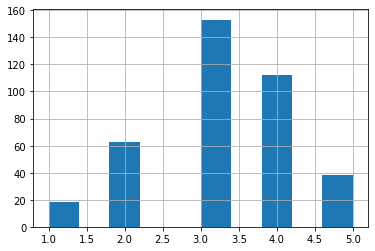

In [5696]:
df.free_time.hist()
df.free_time.describe()

In [5697]:
show_column_info('free_time', 50)

,free_time
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Values present more than 50 times: 3
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Q1: 3.0, Q3: 4.0, IQR: 1.0, Valid range: [1.5, 5.5].


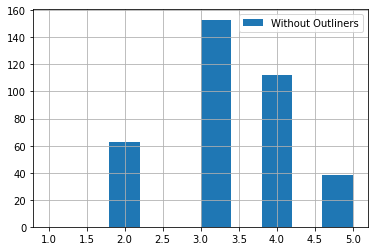

In [5698]:
# do we have outliners in the dataset?
show_without_outliners('free_time', 'Without Outliners')

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64

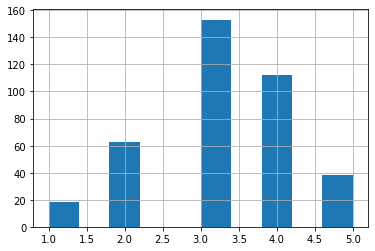

In [5699]:
# Value 1 is considered as an outliner but we know that it is a valid value. Lets not filter it:
df.free_time.hist()
df.free_time.describe()

In [5700]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid

# convert to string values:
normalise_time('free_time')
show_column_info('free_time', 50)

,free_time
average,153
a lot,112
little,63
plenty,38
very little,18


Values present more than 50 times: 3
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   free_time  384 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'go_out'

In [5701]:
df.go_out.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

In [5702]:
# with NaN values:
df.go_out.value_counts(dropna=False)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: go_out, dtype: int64

In [5703]:
# without NaN values:
df.go_out.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: go_out, dtype: int64

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

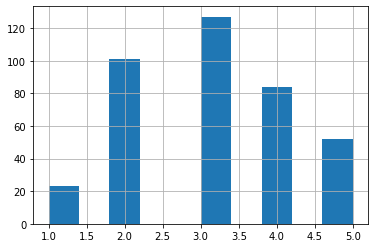

In [5704]:
df.go_out.hist()
df.go_out.describe()

In [5705]:
show_column_info('go_out', 50)

,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Values present more than 50 times: 4
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Q1: 2.0, Q3: 4.0, IQR: 2.0, Valid range: [-1.0, 7.0].


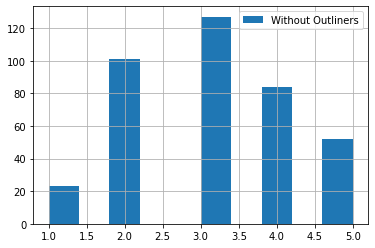

In [5706]:
# do we have outliners in the dataset?
show_without_outliners('go_out', 'Without Outliners')

In [5707]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid and there are no outliners

# convert to string values:
normalise_time('go_out')
show_column_info('go_out', 50)

,go_out
average,127
little,101
a lot,84
plenty,52
very little,23


Values present more than 50 times: 4
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   go_out  387 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'health' 

In [5708]:
df.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

In [5709]:
# with NaN values:
df.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

In [5710]:
# without NaN values:
df.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

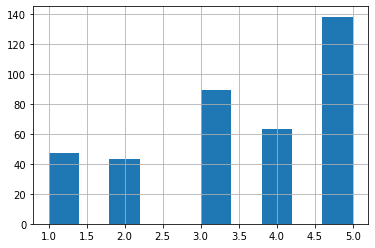

In [5711]:
df.health.hist()
df.health.describe()

In [5712]:
show_column_info('health', 50)

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Values present more than 50 times: 3
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Q1: 3.0, Q3: 5.0, IQR: 2.0, Valid range: [0.0, 8.0].


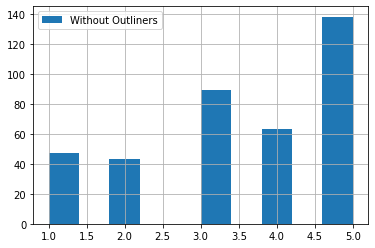

In [5713]:
# do we have outliners in the dataset?
show_without_outliners('health', 'Without Outliners')

In [5714]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid and there are no outliners

# Convert to string values:
df.health = df.health.apply(
    lambda x: None if pd.isna(x) else
    'very unhealthy' if x == 1 else
    'unhealthy' if x == 2 else
    'fair' if x == 3 else
    'healthy' if x == 4 else 'very healthy'
)

show_column_info('health', 50)

,health
very healthy,138
fair,89
healthy,63
very unhealthy,47
unhealthy,43


Values present more than 50 times: 3
Unique values: 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   health  380 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Field 'absences' 

In [5715]:
df.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

In [5716]:
# with NaN values:
df.absences.value_counts(dropna=False)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
NaN       12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
11.0       2
15.0       2
56.0       1
24.0       1
23.0       1
25.0       1
19.0       1
17.0       1
75.0       1
21.0       1
212.0      1
26.0       1
30.0       1
40.0       1
28.0       1
385.0      1
38.0       1
54.0       1
Name: absences, dtype: int64

In [5717]:
# without NaN values:
df.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
14.0      12
12.0      12
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

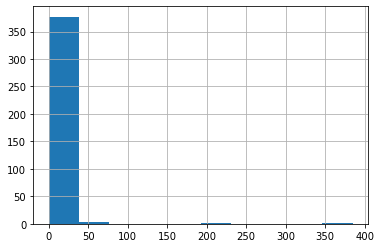

In [5718]:
df.absences.hist()
df.absences.describe()

Q1: 0.0, Q3: 8.0, IQR: 8.0, Valid range: [-12.0, 20.0].


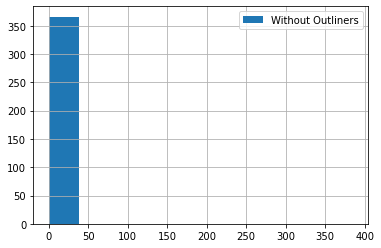

In [5719]:
# do we have outliners in the dataset?
show_without_outliners('absences', 'Without Outliners')

In [5720]:
# So let's filter out the outliners:
q1 = df.absences.quantile(0.25)
q3 = df.absences.quantile(0.75)

iqr = q3 - q1

df.absences = df.absences.apply(
    lambda x: None if pd.isna(x) else x if x >= q1 - 1.5 * iqr and x <= q3 + 1.5 * iqr else None)

show_column_info('absences', 50)

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Values present more than 50 times: 3
Unique values: 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  366 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

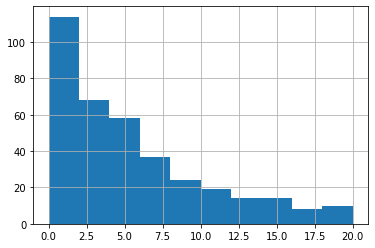

In [5721]:
df.absences.hist()
df.absences.describe()

## Field 'score' 

In [5722]:
df.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

In [5723]:
# with NaN values:
df.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [5724]:
# without NaN values:
df.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

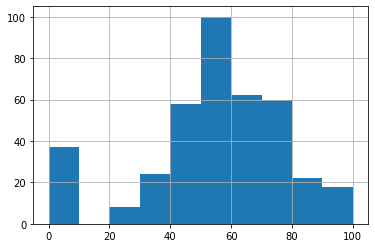

In [5725]:
df.score.hist()
df.score.describe()

Q1: 40.0, Q3: 70.0, IQR: 30.0, Valid range: [-5.0, 115.0].


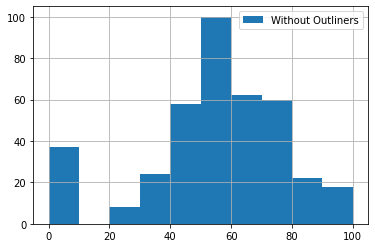

In [5726]:
# do we have outliners in the dataset?
show_without_outliners('score', 'Without Outliners')

In [5727]:
# We see that some of the rows have no value for this field.
# However, if a value is present it is valid and there are no outliners
show_column_info('score', 50)

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


Values present more than 50 times: 1
Unique values: 18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


## Analysis 

In [5728]:
# Lets clear NaN values
df.dropna(inplace=True)
df.describe()

,age,failures,absences,score
count,94.000000,94.000000,94.000000,94.000000
mean,16.829787,0.244681,4.904255,52.340426
std,1.349140,0.599035,5.180753,21.247418
min,15.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,40.000000
50%,17.000000,0.000000,4.000000,55.000000
75%,18.000000,0.000000,6.750000,65.000000
max,22.000000,3.000000,20.000000,95.000000


In [5729]:
df.corr()

,age,failures,absences,score
age,1.000000,0.304878,0.136099,-0.209142
failures,0.304878,1.000000,0.201656,-0.324263
absences,0.136099,0.201656,1.000000,0.068482
score,-0.209142,-0.324263,0.068482,1.000000


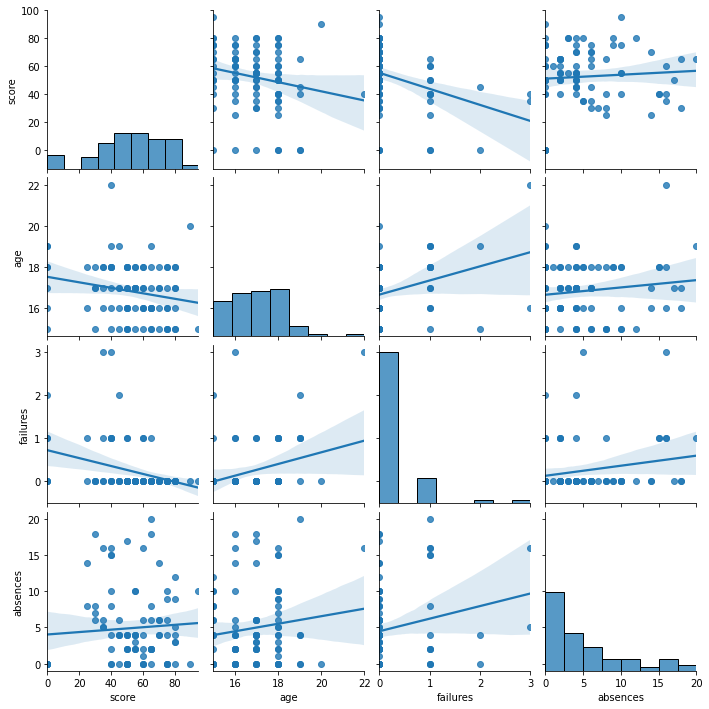

In [5730]:
sns.pairplot(df[['score', 'age', 'failures', 'absences']], kind='reg')

**Observations**:
- Score is not very correlated to the number of absences
- There is some negative correlation between scores and age - the older the kid the lower the score
- There is some negative correlation between scores and number of failures - the more failures the lower the score

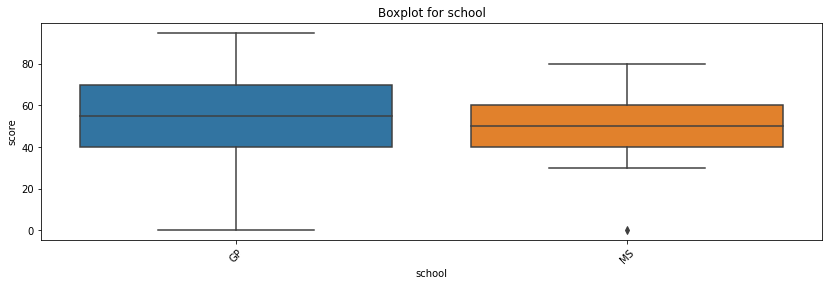

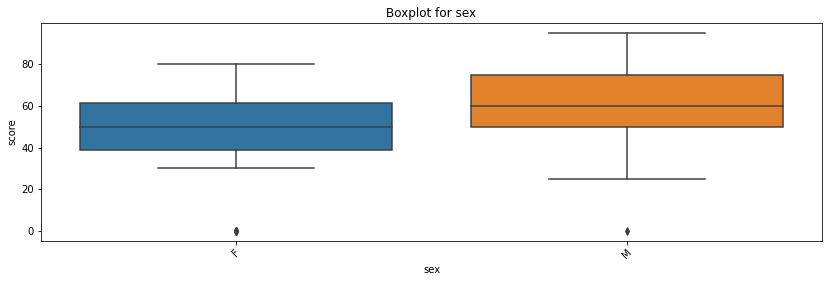

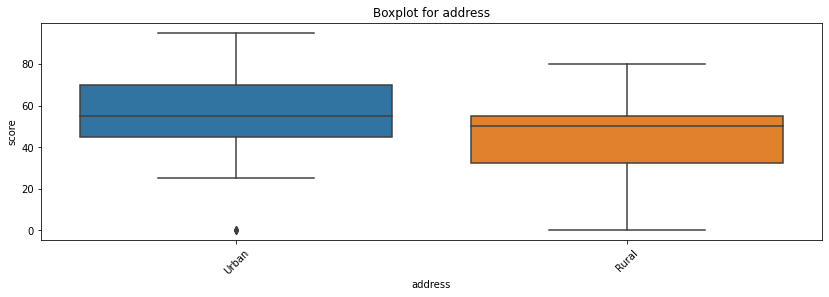

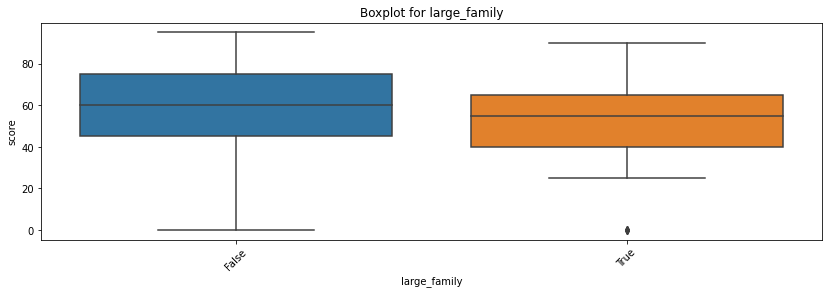

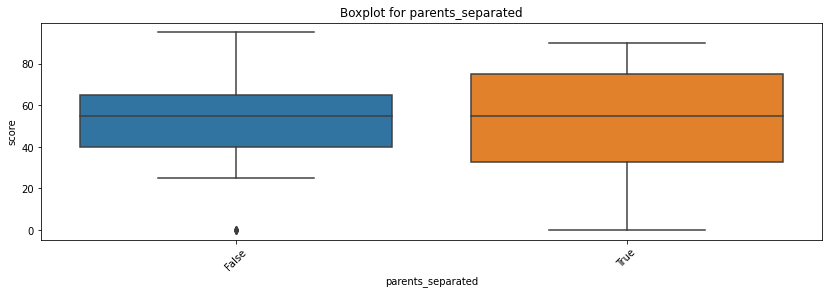

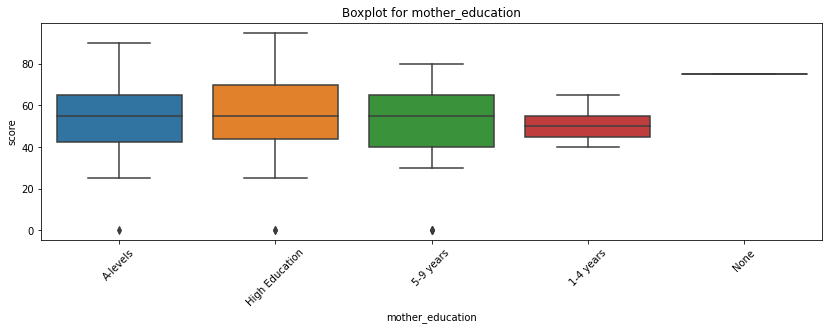

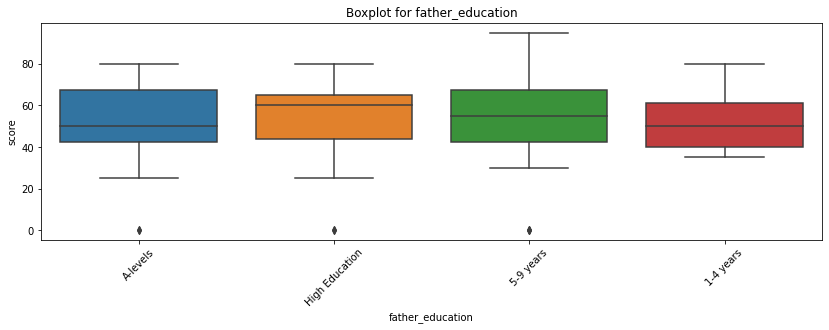

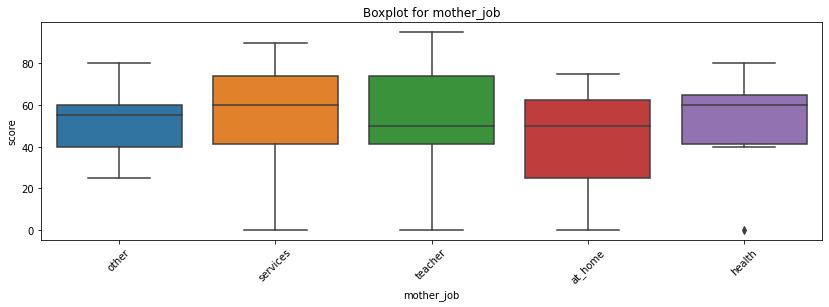

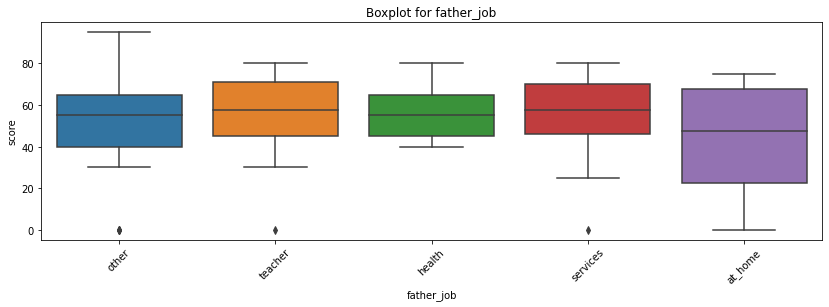

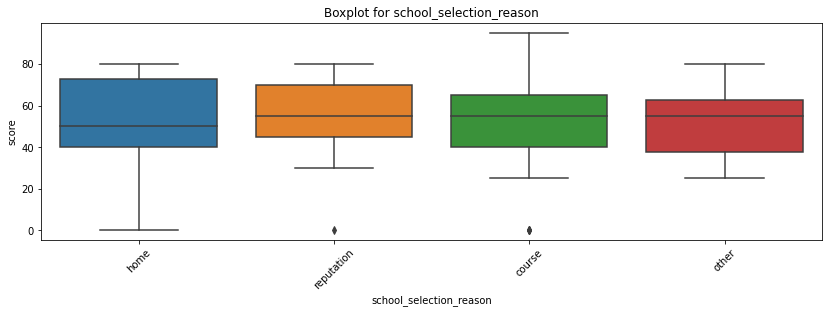

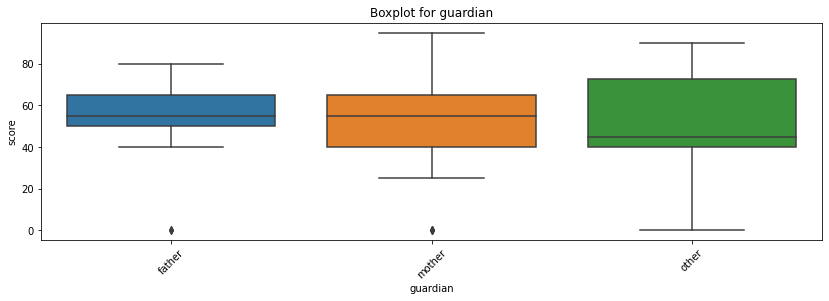

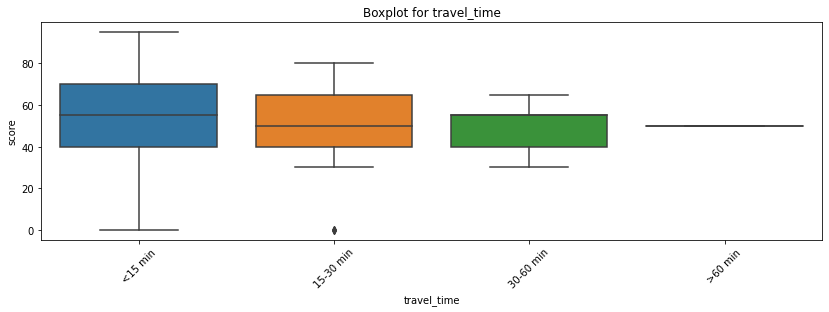

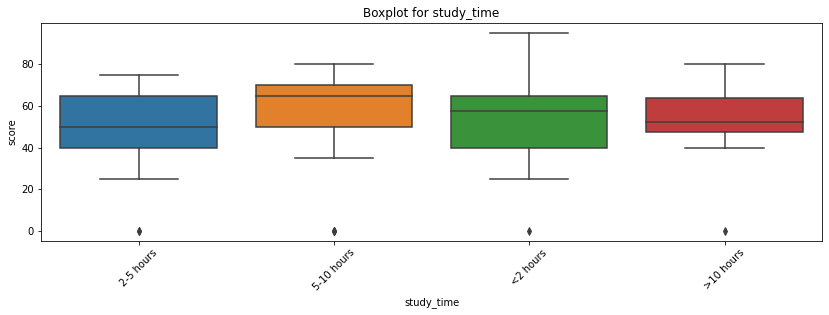

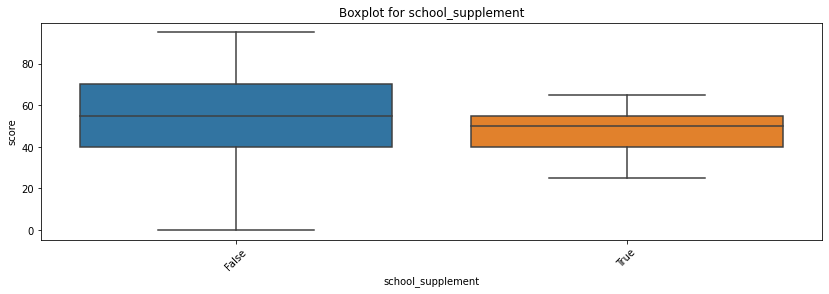

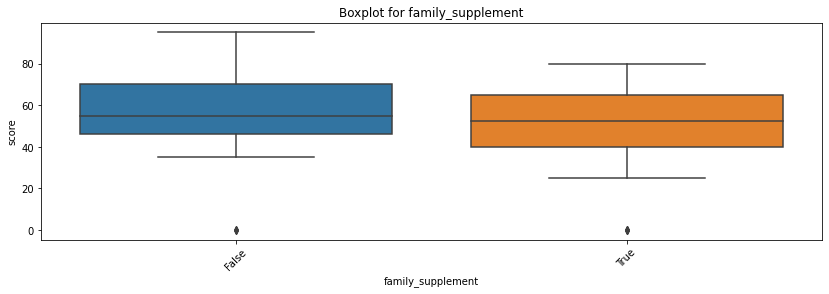

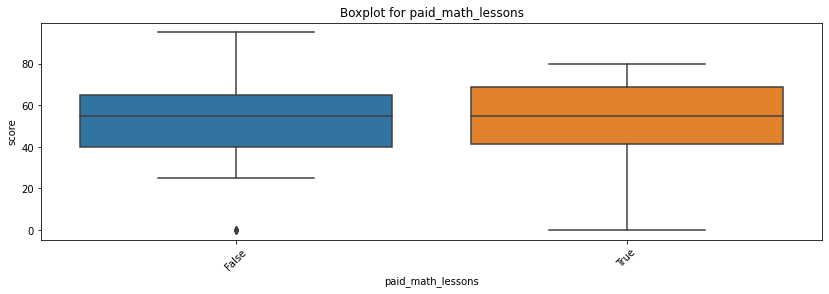

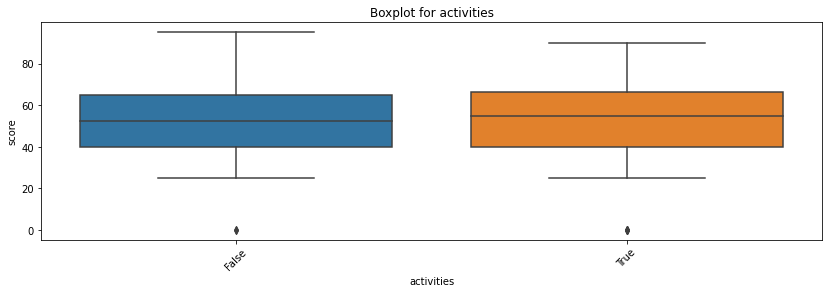

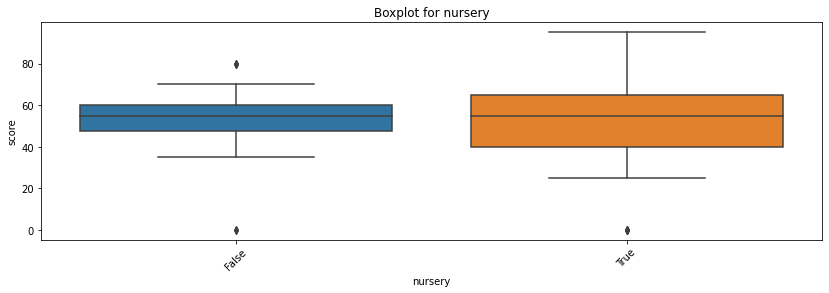

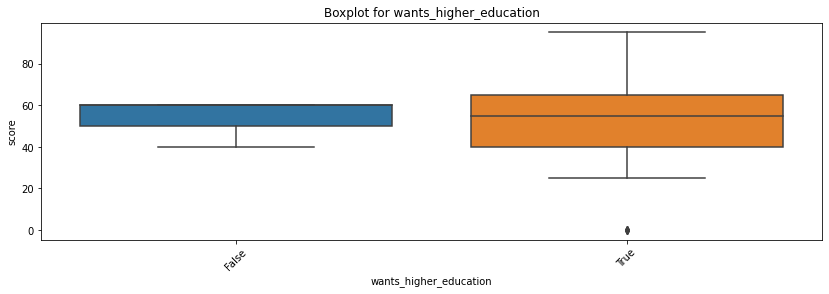

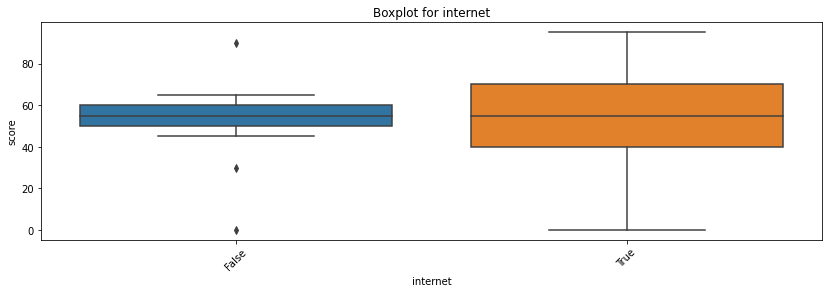

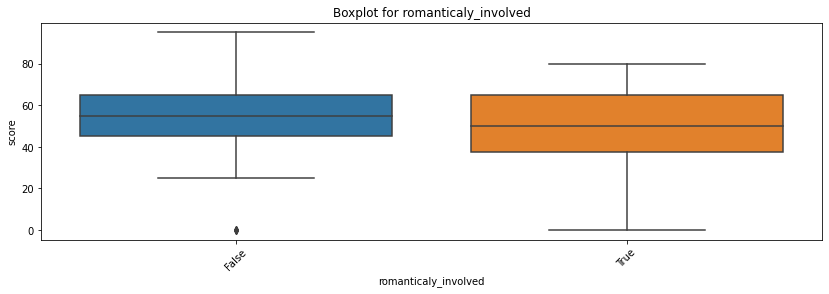

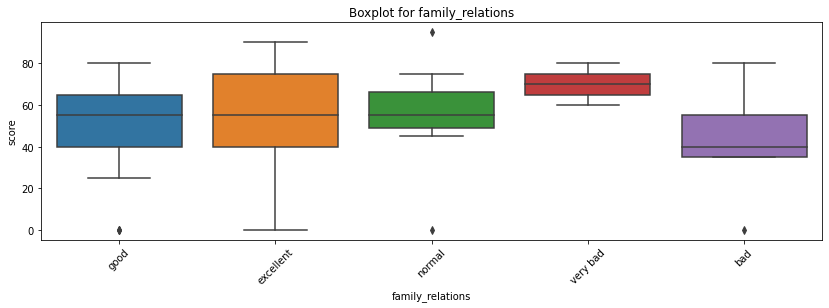

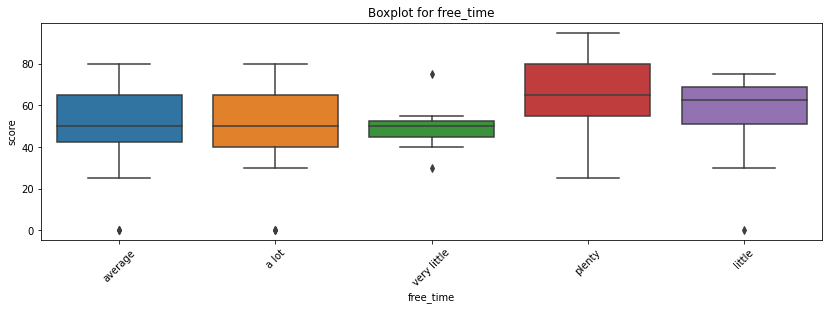

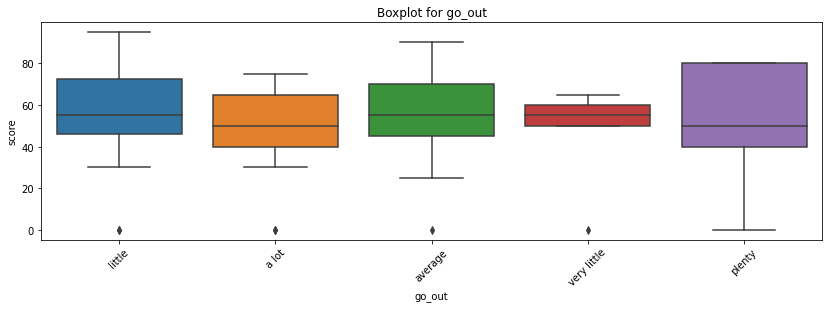

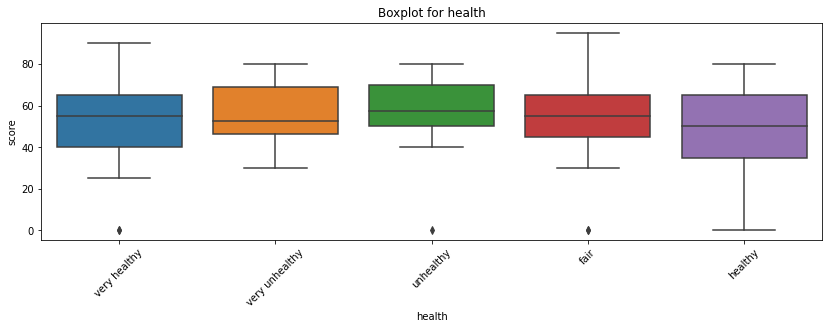

In [5731]:
for col in ['school', 'sex', 'address', 'large_family', 'parents_separated',
            'mother_education', 'father_education', 'mother_job', 'father_job',
            'school_selection_reason', 'guardian', 'travel_time', 'study_time',
            'school_supplement', 'family_supplement', 'paid_math_lessons',
            'activities', 'nursery', 'wants_higher_education', 'internet',
            'romanticaly_involved', 'family_relations', 'free_time', 'go_out',
            'health']:
    get_boxplot(col)

**Observations**:

- The pupils in school GP are more different to each other than the pupils in school MS.
- The pupis from MS tend to have less score
- Males tend to have higher score than femails
- Pupils who live in the cities tend to have higher score than those who live in rural areas
- Pupils from small families tend to have higher score than those from larger families
- Whether parents have been separated or live together has no affect on the score
- Mother's and father's education have some affect on the score
- Mother's and father's job have some affect on the score
- If the school was chosen because of proximity to home has some affect on the score
- There is no difference if a gurdian is father or mother but scores are likely to go down in other cases
- Travel time and study time have some affect on the score
- School and family supplements have some affect on the score
- Score does not correlate to whether paid math lessons were taken or not
- There is some correlation between activities and score
- There is no correlation between nursery and score, and internet and score
- The scores are high if a pupil plans to enter a university
- Being romantically involved, family relationships, free time, health and how much a pupli goes out also affect the score

In [5732]:
for col in ['school', 'sex', 'address', 'large_family', 'parents_separated',
            'mother_education', 'father_education', 'mother_job', 'father_job',
            'school_selection_reason', 'guardian', 'travel_time', 'study_time',
            'school_supplement', 'family_supplement', 'paid_math_lessons',
            'activities', 'nursery', 'wants_higher_education', 'internet',
            'romanticaly_involved', 'family_relations', 'free_time', 'go_out',
            'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address


C:\Users\andrey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\andrey\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Observations**:
- Sex and address (from a city or a rural place) has the most affect on the score

In [5733]:
df_for_model = df.loc[:, ['sex', 'address', 'age', 'failures', 'absences']]
df_for_model.head()

,sex,address,age,failures,absences
4,F,Urban,16,0.0,4.0
5,M,Urban,16,0.0,10.0
7,F,Urban,17,0.0,6.0
10,F,Urban,15,0.0,0.0
14,M,Urban,15,0.0,0.0


# Summary

1. The data contains small number of empty values

2. The data is relatively clean as the outliners were found only in the 'absences' column

3. It is likely that:
- the older the kid the lower the score
- the more failures the lower the score

4.  The most important parameters for the model are as follows:
- sex
- address
- age
- failures
- absences